In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")

In [2]:
cp = pd.read_excel('Pru.xlsx')
cp = cp.append(pd.read_excel('NPru.xlsx'))

In [3]:
newData = pd.DataFrame()
lista = []
for c in cp['Postagens']:
    lista.append(word_tokenize(str(c)))
newData['Postagens'] = lista
newData.head()

,Postagens
0,"[foto, shoot, recente, vai, ter, aqui, porque,..."
1,"[twitter, legal]"
2,"[pois, é, fiz, twitter, novo, user, name, anti..."
3,"[é, bom, twitter, novo]"
4,"[deixado, twitter, chato, é, ultimamente, povo..."


In [4]:
newData['pre_clean_len'] = [len(t) for t in newData['Postagens']]
newData.head()

,Postagens,pre_clean_len
0,"[foto, shoot, recente, vai, ter, aqui, porque,...",10
1,"[twitter, legal]",2
2,"[pois, é, fiz, twitter, novo, user, name, anti...",10
3,"[é, bom, twitter, novo]",4
4,"[deixado, twitter, chato, é, ultimamente, povo...",15


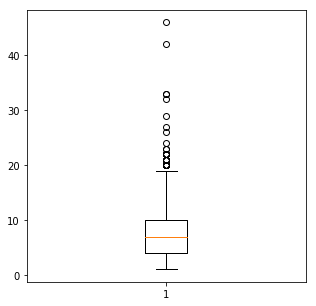

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(newData['pre_clean_len'])
plt.show()

In [5]:
pr = pd.read_excel('Pru.xlsx')
prCount = pr.Postagens.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

In [6]:
prCount = prCount.sort_values(ascending = False)

Text(0,0.5,'Frequency')

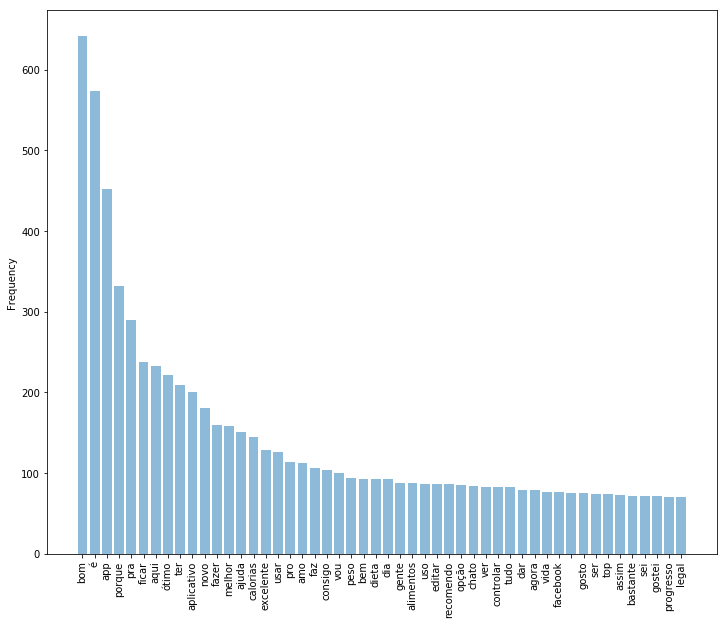

In [8]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, prCount[1:51], align='center', alpha=0.5)
plt.xticks(y_pos, prCount[1:51].index,rotation='vertical')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

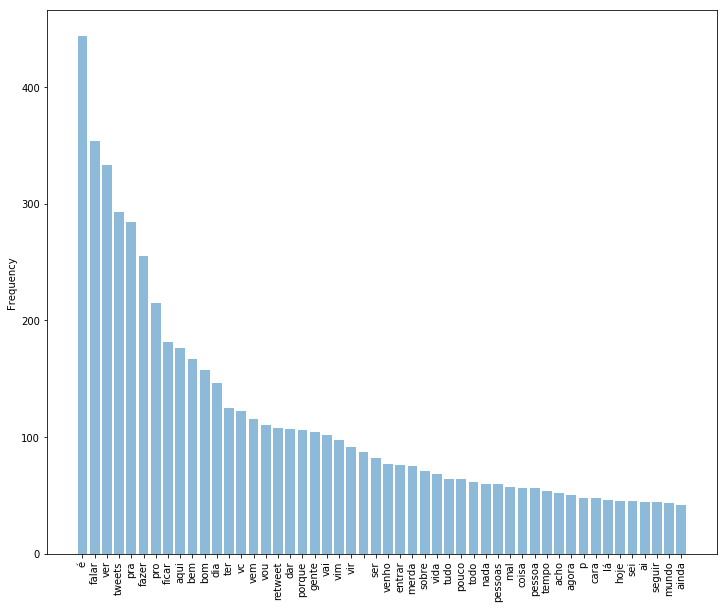

In [9]:
npr = pd.read_excel('NPru.xlsx')
nprCount = npr.Postagens.apply(lambda x: pd.value_counts(str(x).split(" "))).sum(axis = 0)

nprCount = nprCount.sort_values(ascending = False)
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, nprCount[1:51], align='center', alpha=0.5)
plt.xticks(y_pos, nprCount[1:51].index,rotation='vertical')
plt.ylabel('Frequency')

Text(0.5,0,'Frequência em sentenças Não-PRUs')

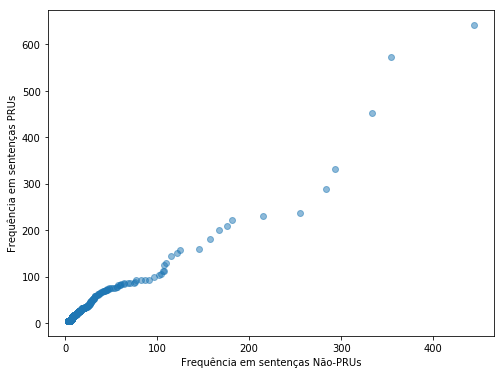

In [10]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x=nprCount[1:1001], y=prCount[1:1001],fit_reg=False, scatter_kws={'alpha':0.5})
plt.ylabel('Frequência em sentenças PRUs')
plt.xlabel('Frequência em sentenças Não-PRUs')

In [11]:
count = pd.DataFrame(columns=['prufrq', 'nprufrq'])
count['prufrq'] = prCount
count['nprufrq'] = nprCount
count.head()

,prufrq,nprufrq
twitter,2049.0,1434.0
bom,642.0,157.0
é,573.0,444.0
app,452.0,8.0
porque,332.0,106.0


In [12]:
count['pos_rate'] = count['prufrq'] * 1./(count['prufrq'] + count['nprufrq'])
count = count.sort_values(by='pos_rate', ascending=False)
count[:30]

,prufrq,nprufrq,pos_rate
ótimo,222.0,1.0,0.995516
peso,94.0,1.0,0.989474
editar,86.0,1.0,0.988506
controlar,82.0,1.0,0.987952
top,74.0,1.0,0.986667
alimentação,59.0,1.0,0.983333
app,452.0,8.0,0.982609
aplicativo,200.0,4.0,0.980392
erro,46.0,1.0,0.978723
perfeito,45.0,1.0,0.978261


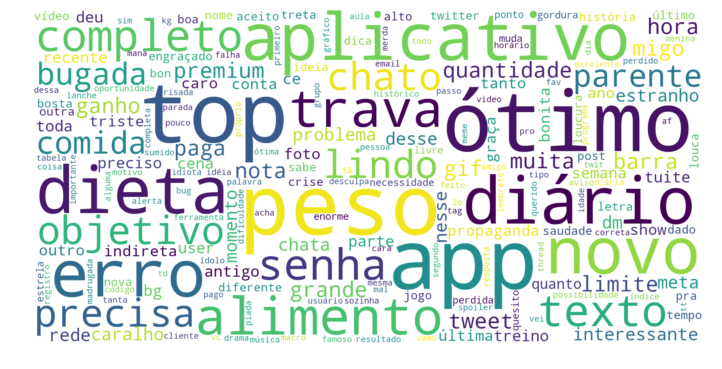

In [23]:
posrate = count.index.str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color="white").generate(posrate)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
wordcloud.to_file("posRate.png")

In [13]:
count['pos_freq_pct'] = count['prufrq'] * 1./count['prufrq'].sum()
count.head()

,prufrq,nprufrq,pos_rate,pos_freq_pct
ótimo,222.0,1.0,0.995516,0.008518
peso,94.0,1.0,0.989474,0.003607
editar,86.0,1.0,0.988506,0.003300
controlar,82.0,1.0,0.987952,0.003146
top,74.0,1.0,0.986667,0.002839


In [20]:
count = count[(count['pos_rate']>0) & (count['pos_freq_pct']>0)]
count

,prufrq,nprufrq,pos_rate,pos_freq_pct
ótimo,222.0,1.0,0.995516,0.008518
peso,94.0,1.0,0.989474,0.003607
editar,86.0,1.0,0.988506,0.003300
controlar,82.0,1.0,0.987952,0.003146
top,74.0,1.0,0.986667,0.002839
alimentação,59.0,1.0,0.983333,0.002264
app,452.0,8.0,0.982609,0.017343
aplicativo,200.0,4.0,0.980392,0.007674
erro,46.0,1.0,0.978723,0.001765
perfeito,45.0,1.0,0.978261,0.001727


In [32]:
count.index

Index(['ótimo', 'peso', 'editar', 'controlar', 'top', 'alimentação', 'app',
       'aplicativo', 'erro', 'perfeito',
       ...
       'u', 'ontem', 'following', 'legais', 'the', 'daí', 'fc', 'veio', 't',
       'followers'],
      dtype='object', length=1735)

In [31]:
from scipy.stats import hmean
count['pos_hmean'] = count.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])))
                                                       
count = count.sort_values(by='pos_hmean', ascending=False)
count.head()

KeyError: ('pos_rate', 'occurred at index prufrq')

In [ ]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
count['pos_rate_normcdf'] = normcdf(count['pos_rate'])
count['pos_freq_pct_normcdf'] = normcdf(count['pos_freq_pct'])
#count['pos_normcdf_hmean'] = hmean([count[count['pos_rate_normcdf'] > 0]['pos_rate_normcdf'], count[count['pos_freq_pct_normcdf'] > 0]['pos_freq_pct_normcdf']])
count = count.sort_values(by='pos_rate_normcdf',ascending=False)
count.head() 

In [ ]:
count['neg_rate'] = count['nprufrq'] * 1./(count['prufrq'] + count['nprufrq'])
count['neg_freq_pct'] = count['nprufrq'] * 1./count['nprufrq'].sum()
count['neg_hmean'] = count.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
count['neg_rate_normcdf'] = normcdf(count['neg_rate'])
count['neg_freq_pct_normcdf'] = normcdf(count['neg_freq_pct'])
count.head()

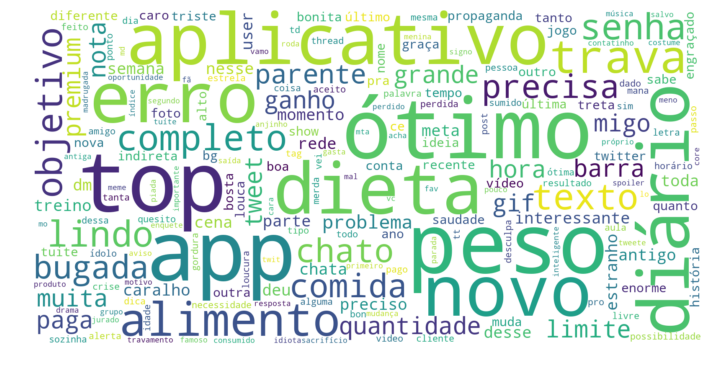

In [40]:
count = count.sort_values(by='pos_rate_normcdf', ascending=False)
posratecdf = count.index.str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color="white").generate(posratecdf)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

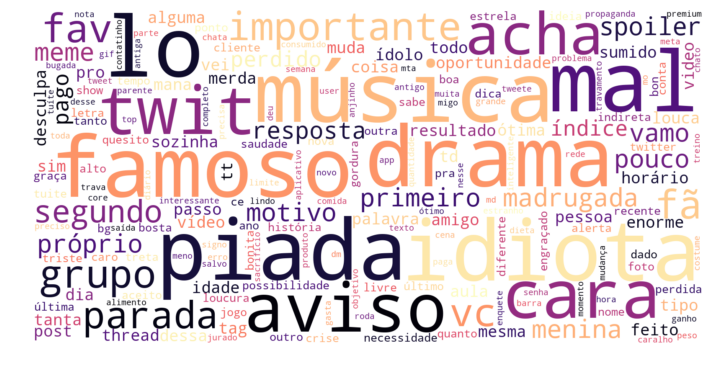

In [43]:
count = count.sort_values(by='neg_rate_normcdf', ascending=False)
negratecdf = count.index.str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color="white",colormap='magma').generate(negratecdf)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5,0,'Non-URP Rate and Frequency Harmonic Mean')

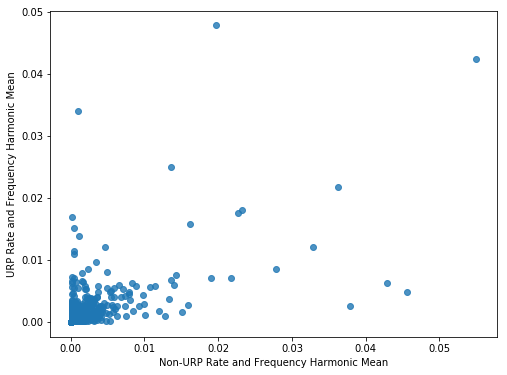

In [57]:
count = count.sort_values(by='pos_hmean', ascending=False)
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.8},data=count[1:])
plt.ylabel('URP Rate and Frequency Harmonic Mean')
plt.xlabel('Non-URP Rate and Frequency Harmonic Mean')

In [ ]:
cdfhmean = count[count['pos_rate_normcdf'] > 0]
cdfhmean = cdfhmean[cdfhmean['pos_freq_pct_normcdf'] > 0]
cdfhmean = cdfhmean[cdfhmean['neg_rate_normcdf'] > 0] 
cdfhmean = cdfhmean[cdfhmean['neg_freq_pct_normcdf'] >0]
cdfhmean['neg_normcdf_hmean'] = hmean([cdfhmean['neg_rate_normcdf'], cdfhmean['neg_freq_pct_normcdf']])
cdfhmean['pos_normcdf_hmean'] = hmean([cdfhmean['pos_rate_normcdf'], cdfhmean['pos_freq_pct_normcdf']])

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.8},data=cdfhmean)
plt.ylabel('Frequência em sentenças PRUs')
plt.xlabel('Frequência em sentenças Não-PRUs')